# Lab7: Exploring Model Misspecification and Hypothesis Testing in Linear Regression
In this lab, we will explore how different underlying data-generating processes impact the results of linear regression and hypothesis tests.

We will generate two datasets with slightly different structures and compare them under a common null hypothesis model using data simulation to calculate empirical p-values.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Define Data Generation Functions
We will generate two datasets with the following equations:

- **Dataset 1**: \( Y = $\beta_0$ + $\beta_1$ X + $\mu$ + error \), where \($\mu$\) is a constant.
- **Dataset 2**: \( Y = $\beta_0$ + $\beta_1$ X + $\mu$ X + error \), where \($\mu$\) varies linearly with \( X \).

For both datasets, the null hypothesis is that the data follows a simple linear relationship \( Y = $\beta_0$ + $\beta_1$ X + error \) with no \($\mu$\).

In [28]:
def generate_dataset(N, beta0, beta1, mu, sigma, variable_mu=False):
    X = np.random.rand(N)
    if variable_mu:
        mu_values = mu * X
    else:
        mu_values = np.full(N, mu)
        
    error = np.random.normal(0, sigma, N)
    
    Y = beta0 + beta1 * X + mu_values + error
    return X, Y

## Generate and Display Datasets
Let's generate and plot the two datasets.

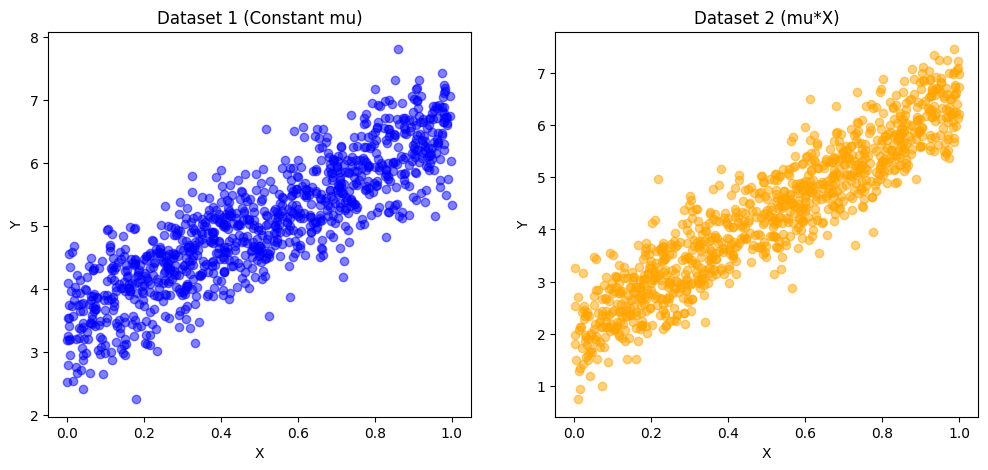

In [29]:
# Parameters
N = 1000  # Number of samples
beta0, beta1 = 2, 3  # True intercept and slope
mu, sigma = 1.5, 0.5  # Constant or variable mu and noise level

# Generate datasets
X1, Y1 = generate_dataset(N, beta0, beta1, mu, sigma, variable_mu=False)
X2, Y2 = generate_dataset(N, beta0, beta1, mu, sigma, variable_mu=True)

# Plot the datasets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X1, Y1, color="blue", alpha=0.5)
plt.title("Dataset 1 (Constant mu)")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(1, 2, 2)
plt.scatter(X2, Y2, color="orange", alpha=0.5)
plt.title("Dataset 2 (mu*X)")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## Fit Linear Regression Models and Calculate Empirical p-values using Simulation
Fit a linear regression model to each dataset under the null hypothesis that \( Y = $\beta_0$ + $\beta_1$ X + error \). To test the significance of \( $\beta_0$ \) and \( $\beta_1$ \), we will simulate data under the null hypothesis and calculate empirical p-values by comparing our observed coefficients to the distribution of simulated coefficients.

3.0985761770361044
3.4757238791549154


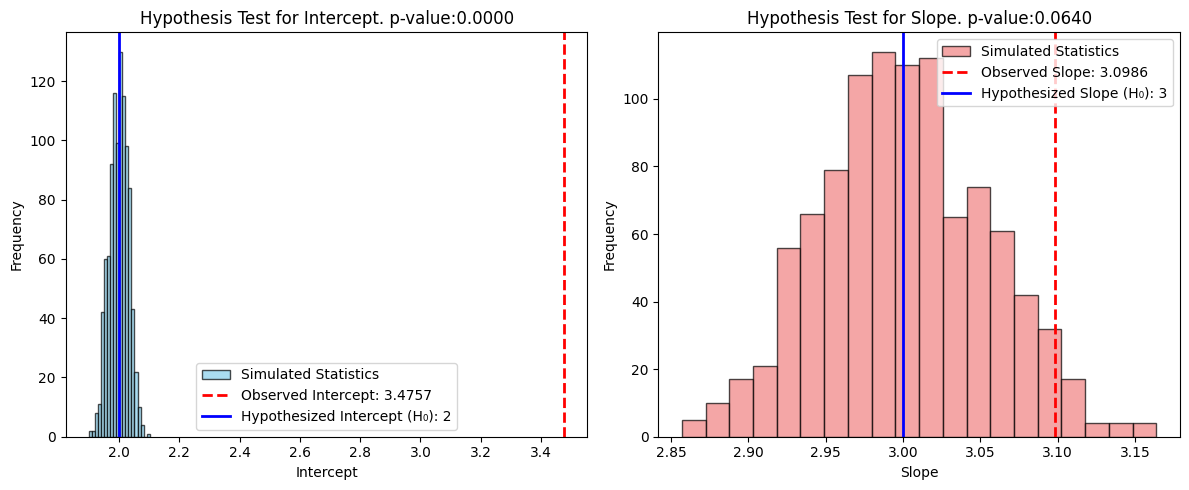

4.526584954986539
1.987840868260193


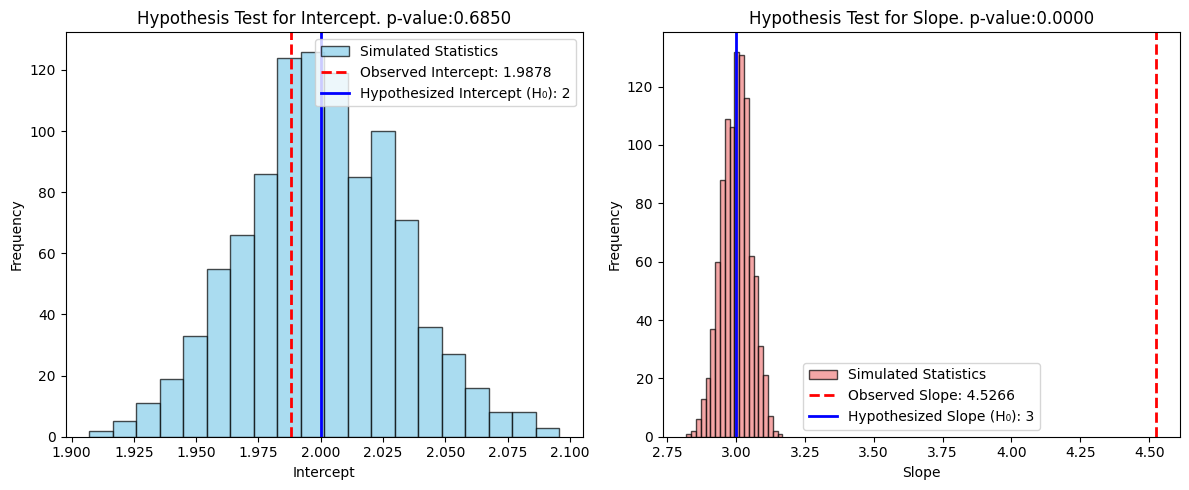

In [64]:
def fit_model_and_simulate_p_value(X, Y, true_beta0, true_beta1, S=1000):
    model = LinearRegression().fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    # Please compute estimated_beta0 and estimated_beta1
    estimated_beta0 = model.intercept_[0]
    estimated_beta1 = model.coef_[0][0]
    print(estimated_beta1)
    print(estimated_beta0)
    
    sim_betas_0 = []
    sim_betas_1 = []
    
    for _ in range(S):
        # Please implement the simulation of Y_sim, and compute sim_betas_0 and sim_betas_1
        Y_sim = true_beta0 + true_beta1 * X + np.random.normal(0, sigma, len(X))
        sim_model = LinearRegression().fit(X.reshape(-1, 1), Y_sim)
        sim_betas_0.append(sim_model.intercept_)
        sim_betas_1.append(sim_model.coef_[0])
        
    # Please compute the p_value_beta0 and p_value_beta1
    p_value_beta0 = np.mean(np.abs(np.array(sim_betas_0) - true_beta0) >= np.abs(estimated_beta0 - true_beta0))
    p_value_beta1 = np.mean(np.abs(np.array(sim_betas_1) - true_beta1) >= np.abs(estimated_beta1- true_beta1))
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(sim_betas_0, bins=20, alpha=0.7, color='skyblue', edgecolor='black', label="Simulated Statistics")
    plt.axvline(estimated_beta0, color='red', linestyle='--', linewidth=2, label=f"Observed Intercept: {estimated_beta0:.4f}")
    plt.axvline(true_beta0, color='blue', linestyle='-', linewidth=2, label=f"Hypothesized Intercept (H₀): {true_beta0}")
    plt.title(f'Hypothesis Test for Intercept. p-value:{p_value_beta0:.4f}')
    plt.xlabel("Intercept")
    plt.ylabel("Frequency")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(sim_betas_1, bins=20, alpha=0.7, color='lightcoral', edgecolor='black', label="Simulated Statistics")
    plt.axvline(estimated_beta1, color='red', linestyle='--', linewidth=2, label=f"Observed Slope: {estimated_beta1:.4f}")
    plt.axvline(true_beta1, color='blue', linestyle='-', linewidth=2, label=f"Hypothesized Slope (H₀): {true_beta1}")
    plt.title(f'Hypothesis Test for Slope. p-value:{p_value_beta1:.4f}')
    plt.xlabel("Slope")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Fit models and simulate p-values
fit_model_and_simulate_p_value(X1, Y1, beta0, beta1) # Please pass appropriate parameters
fit_model_and_simulate_p_value(X2, Y2, beta0, beta1) # Please pass appropriate parameters
